# MindSync: Mental Health Fitness Tracker

## STEP 1: IMPORT THE NECESSARY LIBRARIES

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## STEP 2: READ THE DATA FROM THE CSV FILES

In [25]:
df1 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
df2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')

## STEP 3: FILL MISSING VALUES IN NUMERIC COLUMNS OF DATAFRAMES df1 AND df2 WITH THE MEAN OF THEIR RESPECTIVE COLUMNS

In [26]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())


## STEP 4: CONVERT DATA TYPES

In [27]:
df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'] = df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].astype(float)
df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)


## STEP 5: MERGE THE TWO DATAFRAMES ON A COMMON COLUMN

In [28]:
merged_df = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'])


## STEP 6: FEATURE THE MATRIX X AND THE VARIABLE y

In [29]:
X = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]

y = merged_df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']

## STEP 7: SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## STEP 8: FIT THE LINEAR REGRESSION MODEL

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## STEP 9: MAKE A PREDICTION USING TRAINED MODEL

In [32]:
y_pred = model.predict(X_test)

## STEP 10: EVALUATE THE MODEL'S PERFORMANCE USING RIDGE REGRESSION AND LASSO REGRESSION

In [33]:
# Example using Ridge regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
print('Ridge Regression - Mean Squared Error:', ridge_mse)
print('Ridge Regression - R-squared Score:', ridge_r2)

# Example using Lasso regression
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
print('Lasso Regression - Mean Squared Error:', lasso_mse)
print('Lasso Regression - R-squared Score:', lasso_r2)


Ridge Regression - Mean Squared Error: 1.8852828652623428
Ridge Regression - R-squared Score: 0.6309285836156879
Lasso Regression - Mean Squared Error: 2.7797420357684963
Lasso Regression - R-squared Score: 0.455825250827106


## STEP 11: FITTING REGRESSION MODELS TO THE TRAINING DATA AND MAKING PREDICTION ON THE TEST DATA AND CALCULATING MEAN SQUARED ERROR (MSE) AND R-SQUARED SCORE FOR EACH MODEL

In [34]:
# Fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict using Ridge Regression
ridge_y_pred = ridge_model.predict(X_test)

# Calculate MSE and R-squared score for Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("Ridge Regression:")
print("Mean Squared Error (MSE):", ridge_mse)
print("R-squared Score:", ridge_r2)

# Fit Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predict using Lasso Regression
lasso_y_pred = lasso_model.predict(X_test)

# Calculate MSE and R-squared score for Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print("Lasso Regression:")
print("Mean Squared Error (MSE):", lasso_mse)
print("R-squared Score:", lasso_r2)


Ridge Regression:
Mean Squared Error (MSE): 1.900177686158299
R-squared Score: 0.6280127067750545
Lasso Regression:
Mean Squared Error (MSE): 4.392554827214733
R-squared Score: 0.14009379626950635


## STEP 12: IT DISPLAYS SCORE OF BOTH THE MODELS IN A VISUAL FORMAT

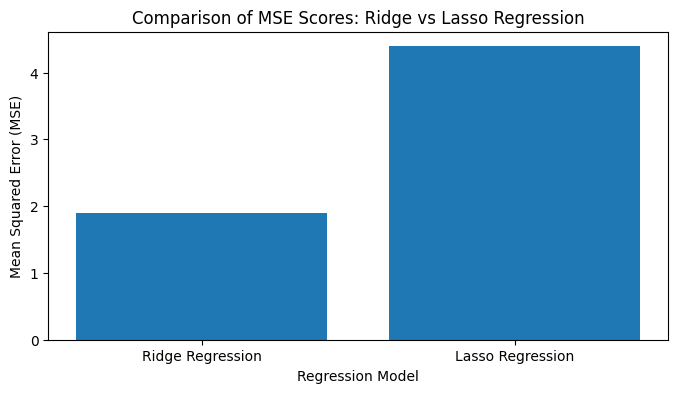

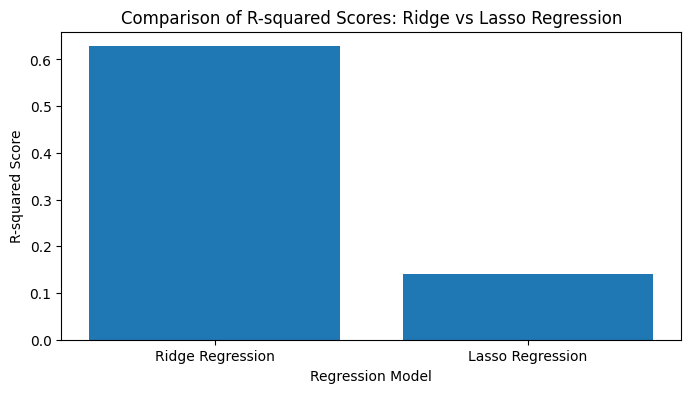

In [35]:
# Calculate MSE and R-squared scores
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

# Create a bar plot for MSE scores
plt.figure(figsize=(8, 4))
plt.bar(['Ridge Regression', 'Lasso Regression'], [ridge_mse, lasso_mse])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE Scores: Ridge vs Lasso Regression')
plt.show()

# Create a bar plot for R-squared scores
plt.figure(figsize=(8, 4))
plt.bar(['Ridge Regression', 'Lasso Regression'], [ridge_r2, lasso_r2])
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores: Ridge vs Lasso Regression')
plt.show()

## STEP 13: IT PRINTS OUT THE RESULT AS WELL AS THE CODE

In [36]:
# Compare the scores of Ridge Regression and Lasso Regression
if ridge_mse < lasso_mse and ridge_r2 > lasso_r2:
    print("Ridge Regression is more accurate.")
    print("Reason: Ridge Regression has a lower MSE and higher R-squared score.")
elif lasso_mse < ridge_mse and lasso_r2 > ridge_r2:
    print("Lasso Regression is more accurate.")
    print("Reason: Lasso Regression has a lower MSE and higher R-squared score.")
elif ridge_mse == lasso_mse and ridge_r2 == lasso_r2:
    print("Both Ridge Regression and Lasso Regression have similar accuracy.")
    print("Reason: The MSE and R-squared scores are equal for both models.")
else:
    print("Unable to determine which model is more accurate.")


Ridge Regression is more accurate.
Reason: Ridge Regression has a lower MSE and higher R-squared score.
